# TimeCourse

 

## Imports and Getting the Test Model

In [1]:
%matplotlib inline
import site
site.addsitedir('//home/b3053674/Documents/pycotools')
from pycotools import model, tasks, viz
from pycotools.Tests import test_models
import os
import pandas
from lxml import etree


import logging
logging.basicConfig(format = '%(levelname)s:%(message)s')
LOG=logging.getLogger()

## get string model from test_models
zi_model_string = test_models.TestModels().zi_model()

## get a working directory. Change this to change this to wherever you like
directory = r'/home/b3053674/Documents/pycotools/pycotools/Examples'

## choose path to zi model
zi_path = os.path.join(directory, 'zi2012.cps')

##write model to file
with open(zi_path, 'w') as f:
    f.write(zi_model_string)
    
## check file exists
if not os.path.isfile(zi_path):
    raise Exception

zi = model.Model(zi_path)

root:INFO:27:    Initializing pycotools
root:INFO:28:    Initializing logging System
root:INFO:29:    logging config file at: //home/b3053674/Documents/pycotools/pycotools/logging_config.conf


//home/b3053674/Documents/pycotools/pycotools/viz.py:116: FutureWarning: The pandas.parser module is deprecated and will be removed in a future version. Please import from the pandas.io.parser instead
  from pandas.parser import CParserError


# Deterministic Time Course
## Run a deterministic time course

In [2]:
TC = tasks.TimeCourse(
    zi, report_name='zi_timecourse_report.txt',
    end=1000, intervals=50, step_size=20
)

## check its worked
os.path.isfile(TC.report_name)


df = pandas.read_csv(TC.report_name, sep='\t')
df.head()

,Time,[Smad3n],[Smad3c],[Smad4n],[Smad4c],[T1R_Surf],[T2R_Cave],[T2R_Surf],[Smads_Complex_n],[T1R_EE],...,Values[Kcd],Values[kr_Cave],Values[ki_Cave],Values[Kexp_Smad4n],Values[Kdiss_Smads_Complex_n],Values[Kimp_Smad2c],Values[Kimp_Smads_Complex_c],Values[Kimp_Smad4c],Values[Kdeg_T2R_EE],Values[k_Smads_Complex_c]
0,0,236.450,492.610,551.720,1149.400,0.237000,1.778000,0.202000,0.000,2.060000,...,0.005,0.03742,0.33,0.5,0.1174,0.16,0.16,0.08,0.025,0.000069
1,20,190.086,331.218,529.637,979.915,0.041292,0.903526,0.012959,252.781,1.175980,...,0.005,0.03742,0.33,0.5,0.1174,0.16,0.16,0.08,0.025,0.000069
2,40,179.937,277.649,534.984,921.180,0.028182,0.492606,0.015320,396.764,0.706949,...,0.005,0.03742,0.33,0.5,0.1174,0.16,0.16,0.08,0.025,0.000069
3,60,180.350,276.037,536.916,919.062,0.016803,0.318202,0.021237,408.415,0.429919,...,0.005,0.03742,0.33,0.5,0.1174,0.16,0.16,0.08,0.025,0.000069
4,80,183.149,285.947,538.168,929.488,0.009548,0.273063,0.030828,392.415,0.258271,...,0.005,0.03742,0.33,0.5,0.1174,0.16,0.16,0.08,0.025,0.000069


### Save time course configured model

In [3]:
zi = TC.model
zi.save()

Model(name=Zi2007_TGFbeta_signaling, time_unit=min, volume_unit=l, quantity_unit=nmol)

The following equation must hold true: $intervals \cdot step\_size = end$. Alternatively, the model can be saved by setting the `save` keyword to True. 

## Being selective about which output variables to select
Use the `metabolites`, `global_quantities` and `local_parameters` arguments

In [7]:
TC=tasks.TimeCourse(
    zi,
    report_name='zi_timecourse_report.txt',
    end=1000,
    intervals=50,
    step_size=20,
    metabolites=['Smad3c','Smad3n', 'Smad4n', 'Smad4c'],
    global_quantities = [],
    save=True
)

##check that we only have two variables
pandas.read_csv(TC.report_name,sep='\t').head()

,Time,[Smad3c],[Smad3n],[Smad4n],[Smad4c]
0,0,492.610,236.450,551.720,1149.400
1,20,331.218,190.086,529.637,979.915
2,40,277.649,179.937,534.984,921.180
3,60,276.037,180.350,536.916,919.062
4,80,285.947,183.149,538.168,929.488


# Alternative Solvers
Valid arguments for the `method` argument of `TimeCourse` are:
-  deterministic
-  direct
-  gibson_bruck
-  tau_leap
-  adaptive_tau_leap
-  hybrid_runge_kutta
-  hybrid_lsoda

Copasi also includes a `hybrid_rk45` solver but this is not yet supported by Pycotools. To use an alternative solver, pass the name of the solver to the `method` argument. 

In [5]:
## This will fail
TC2 = tasks.TimeCourse(
    zi, report_name='zi_timecourse_report.txt', method='direct',
    end=1000, intervals=50, step_size=20
)

Note that this model is specifically a deterministic model and will not simulate with the stochastic or hybrid solvers. 

# Visualization

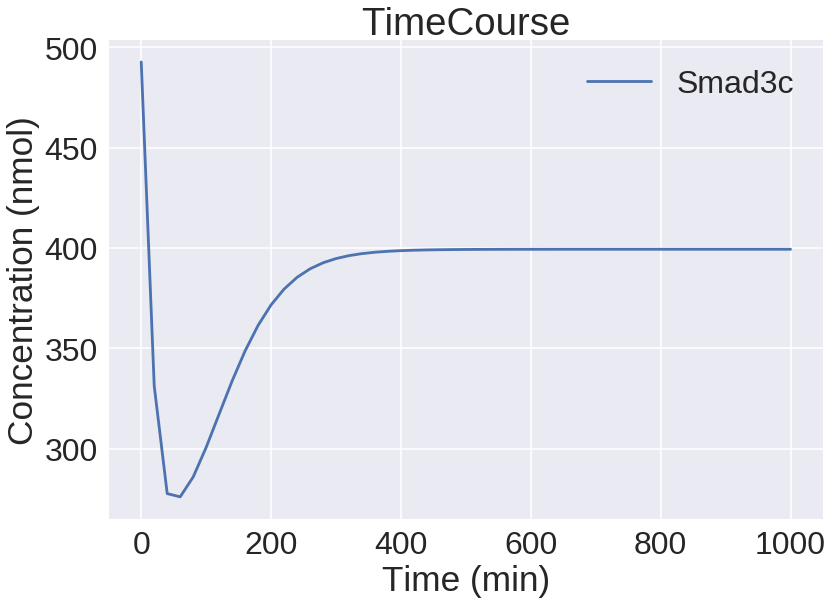

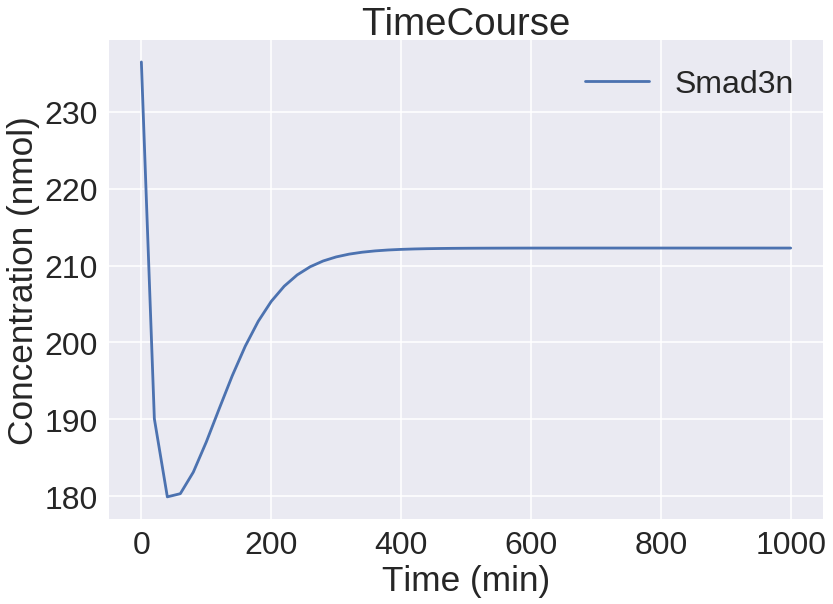

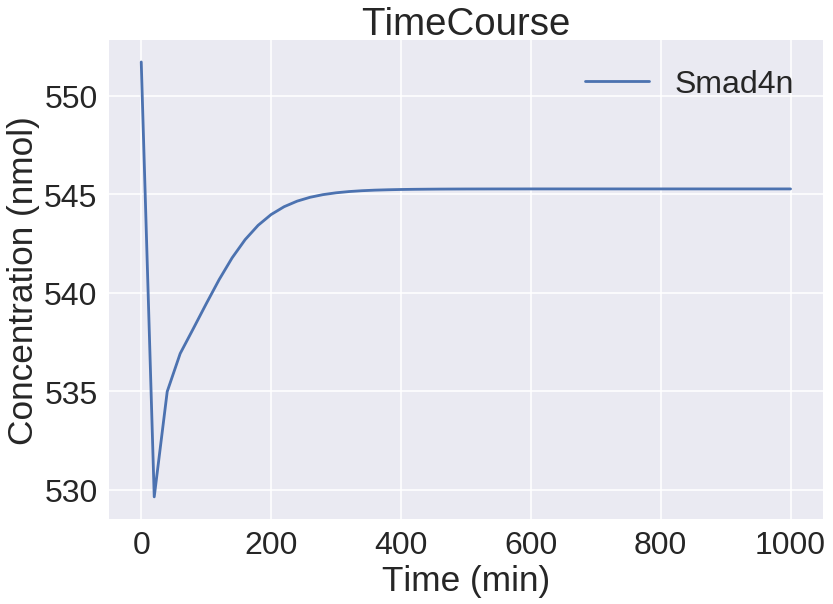

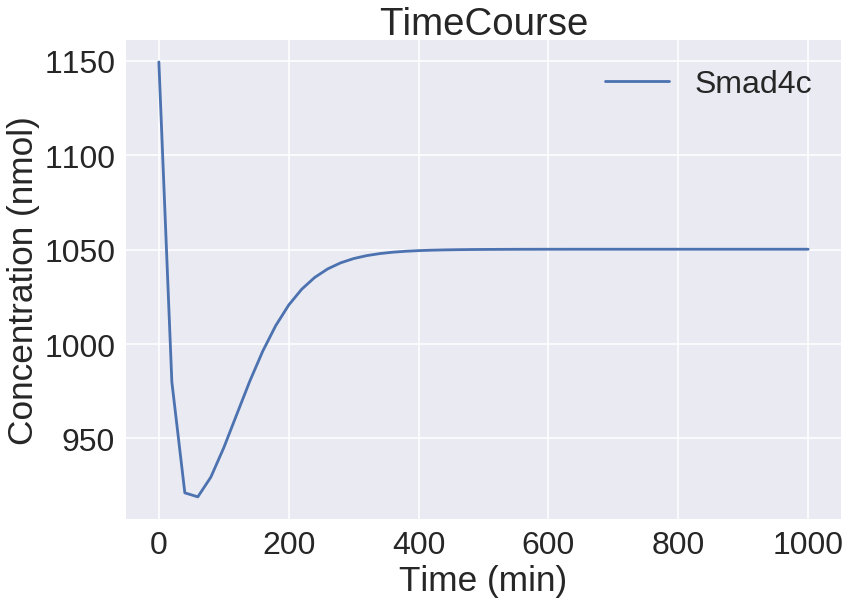

In [8]:
viz.PlotTimeCourse(TC)

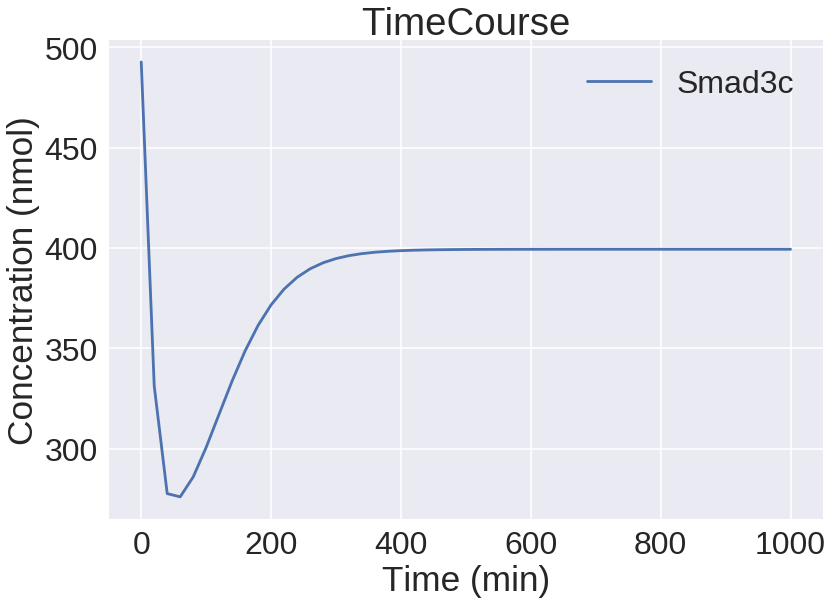

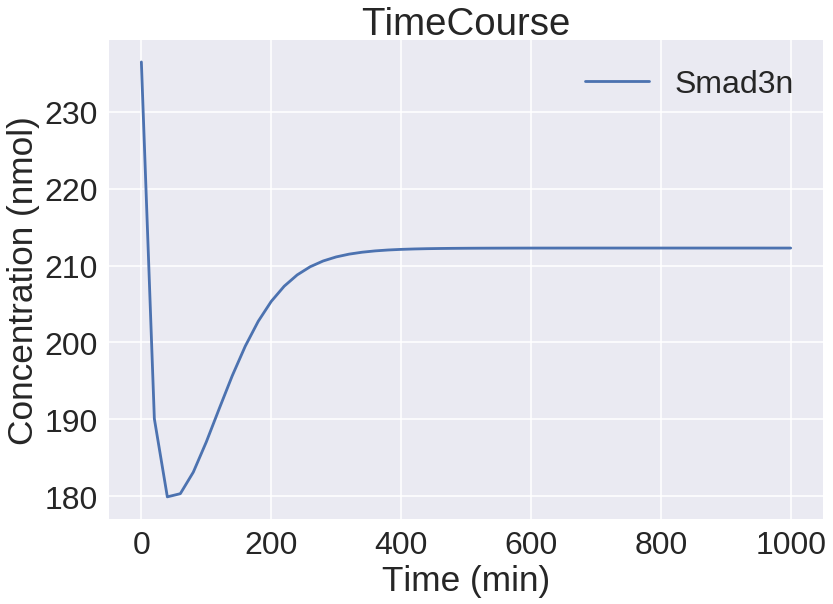

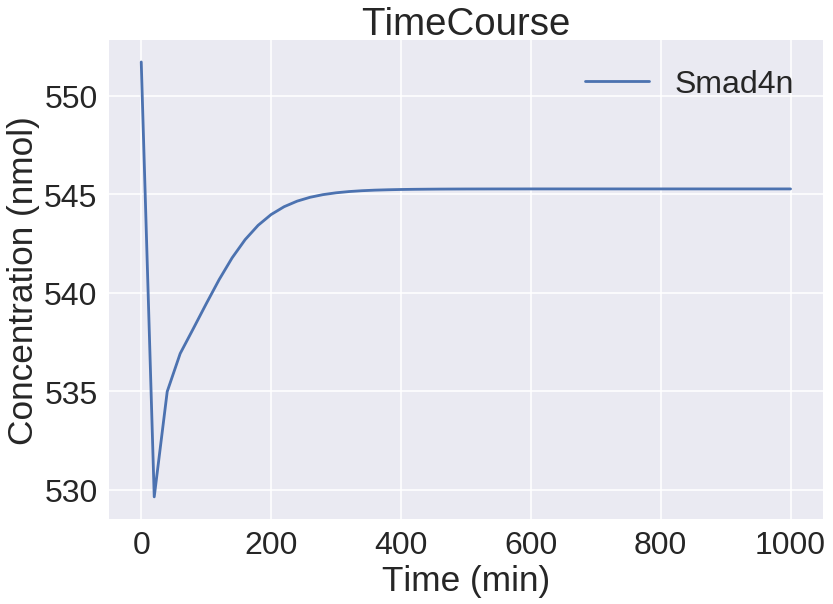

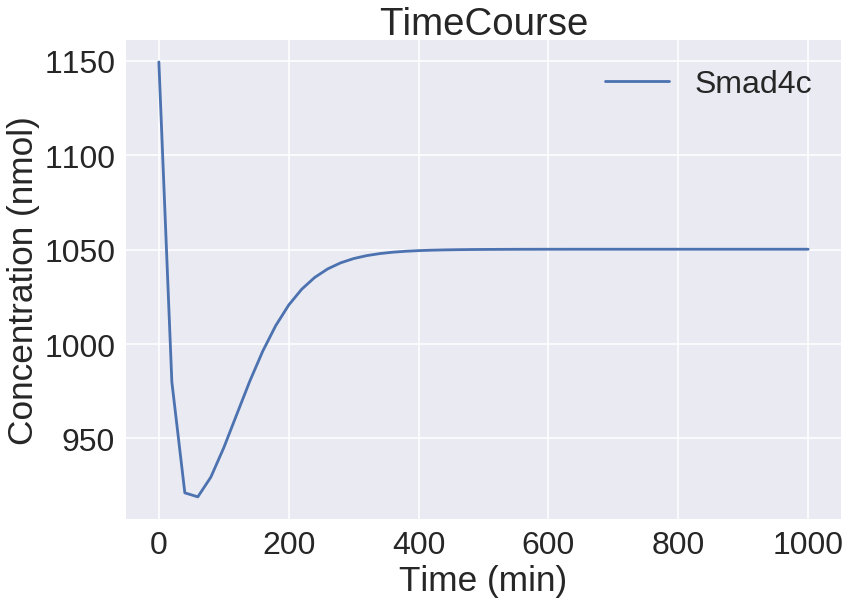

In [9]:
viz.PlotTimeCourse(TC)

Here we have used the `save=True` argument to save the model inplace, rather reassigning the zi model manually. 

## Plot the results
By default all species are plotted separetly

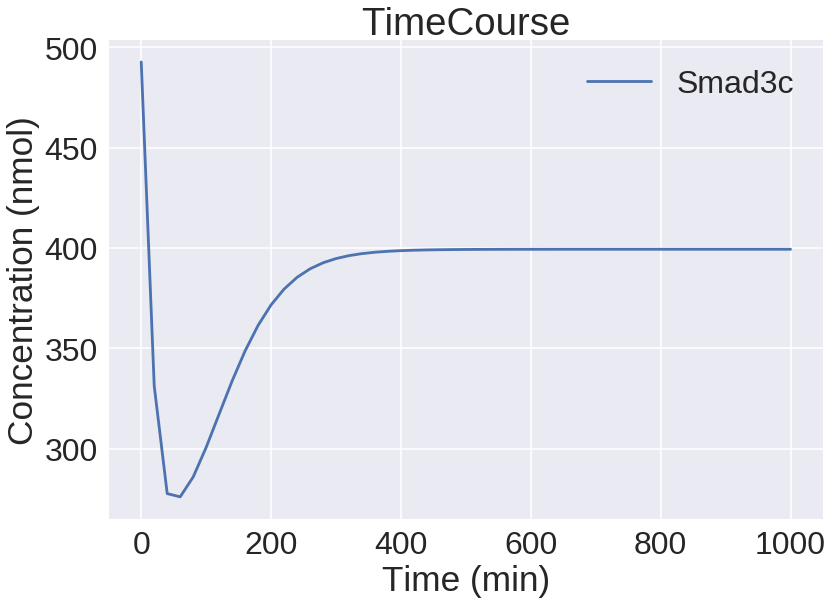

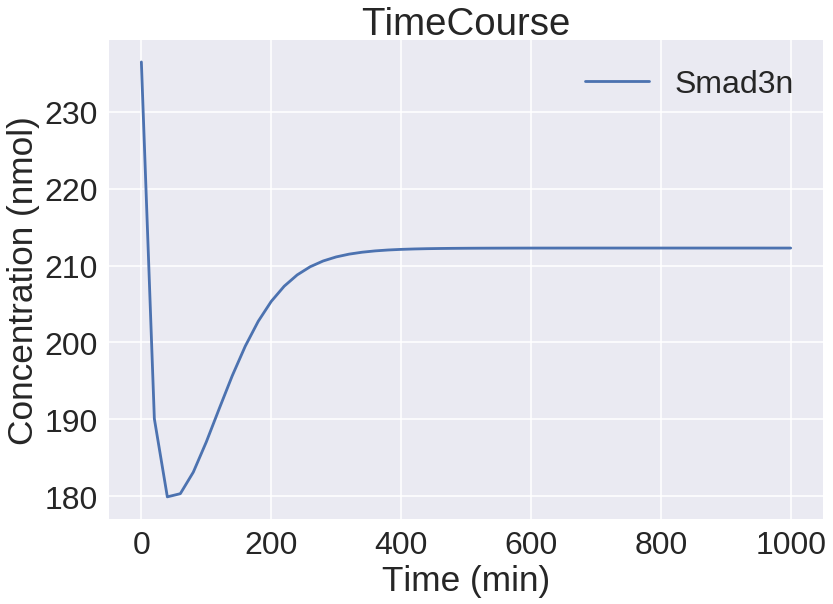

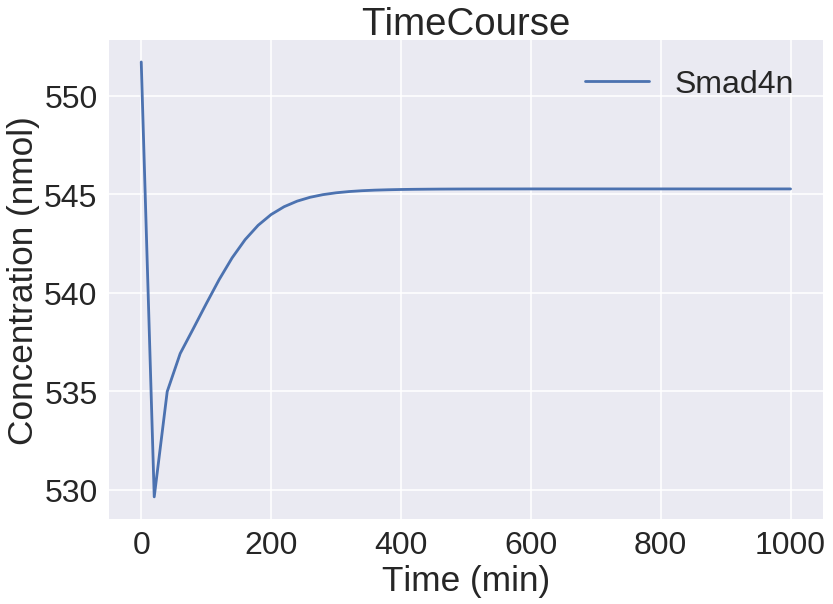

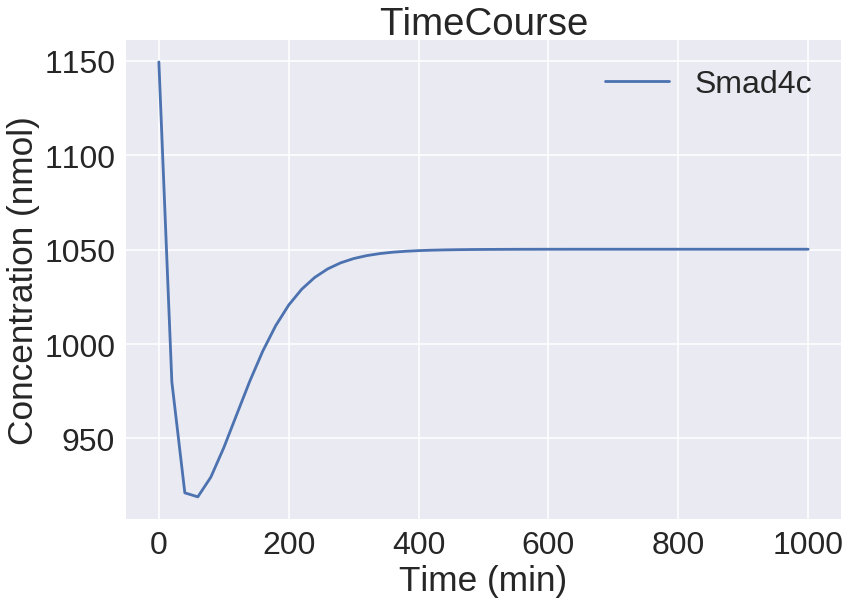

In [10]:
viz.PlotTimeCourse(TC)

## Plot on the same axis
We can plot on the same axis

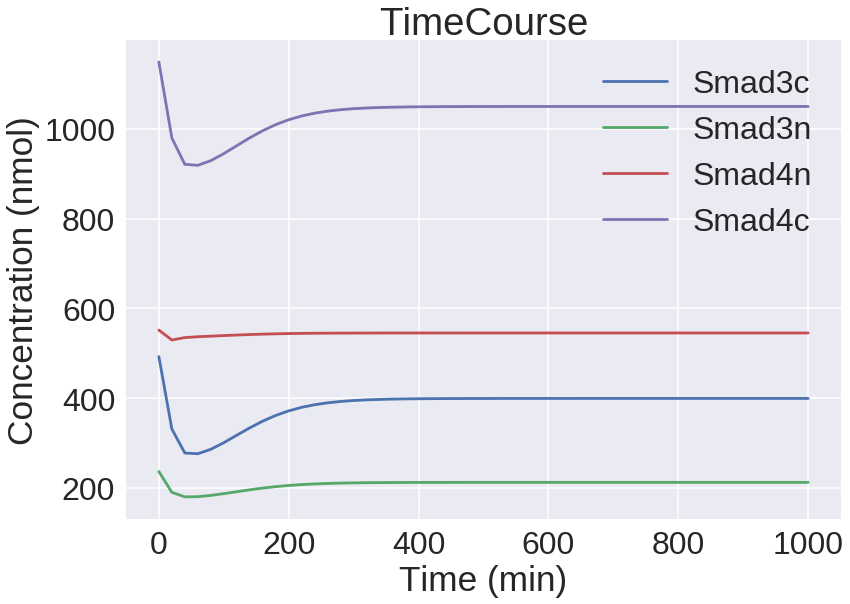

In [11]:
viz.PlotTimeCourse(TC, separate=False)

## Choose Y variables

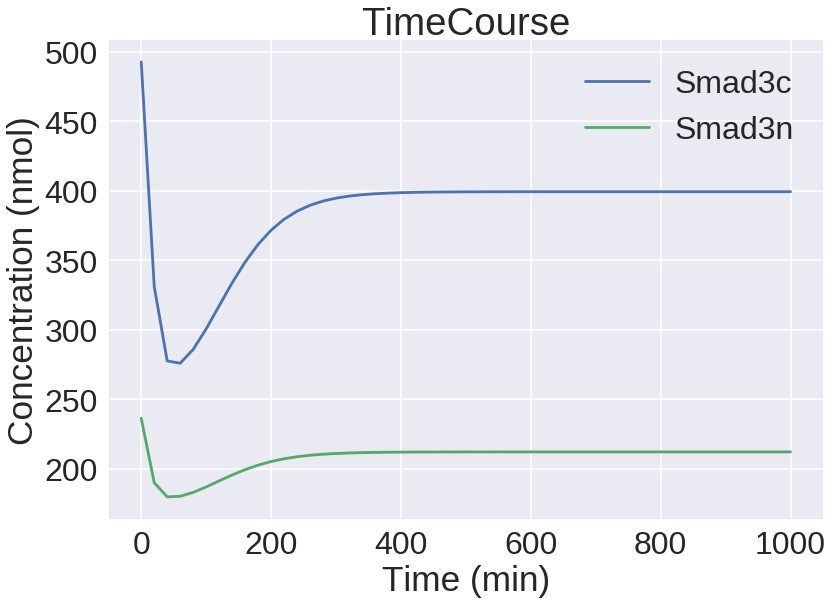

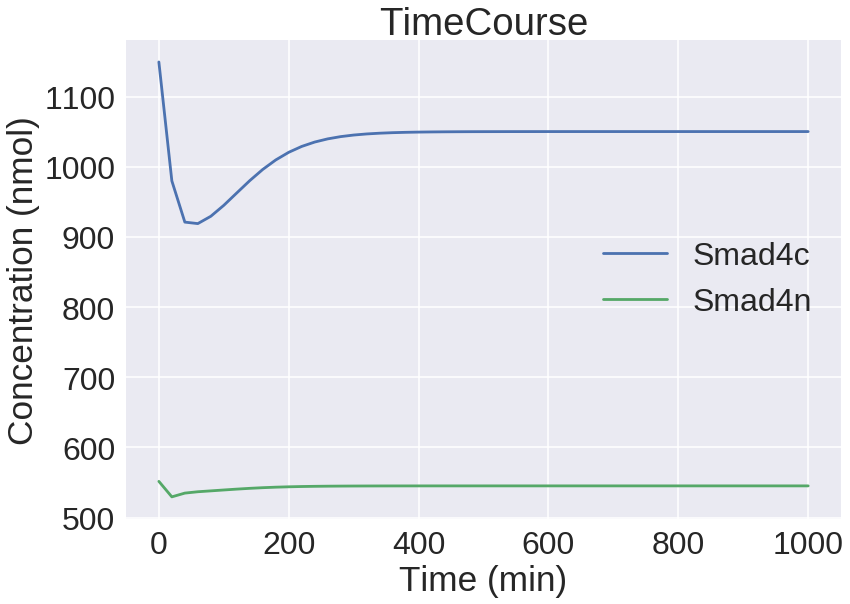

In [12]:
viz.PlotTimeCourse(TC, y=['Smad3c', 'Smad3n'], separate=False)
viz.PlotTimeCourse(TC, y=['Smad4c', 'Smad4n'], separate=False)

## Plot as Phase Space
Choose the x variable to plot phase space. Same arguments apply as above. 

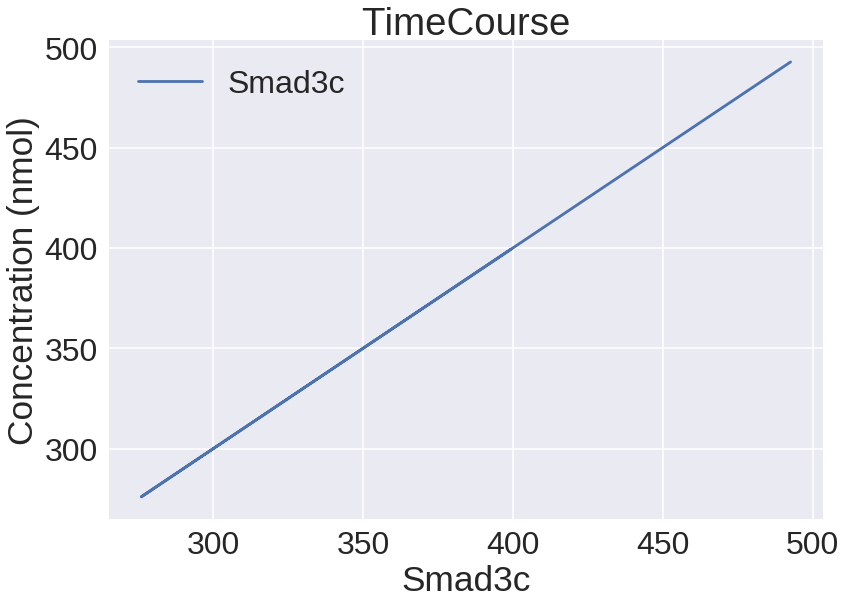

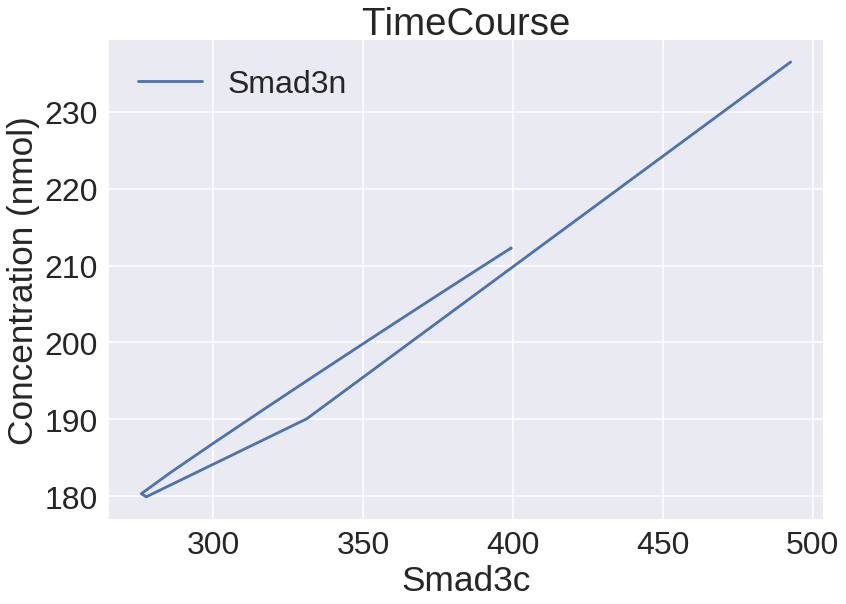

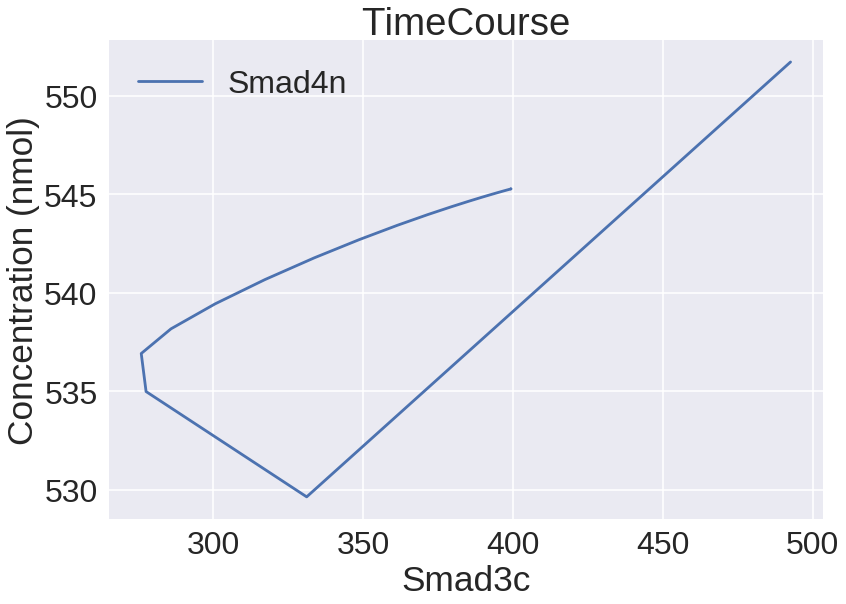

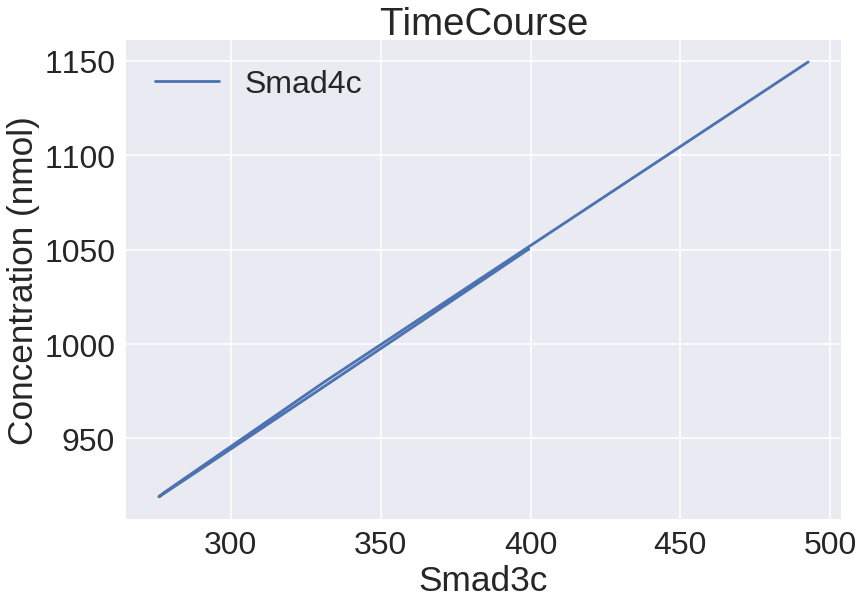

In [13]:
viz.PlotTimeCourse(TC, x='Smad3c', separate=True)

## Save to file

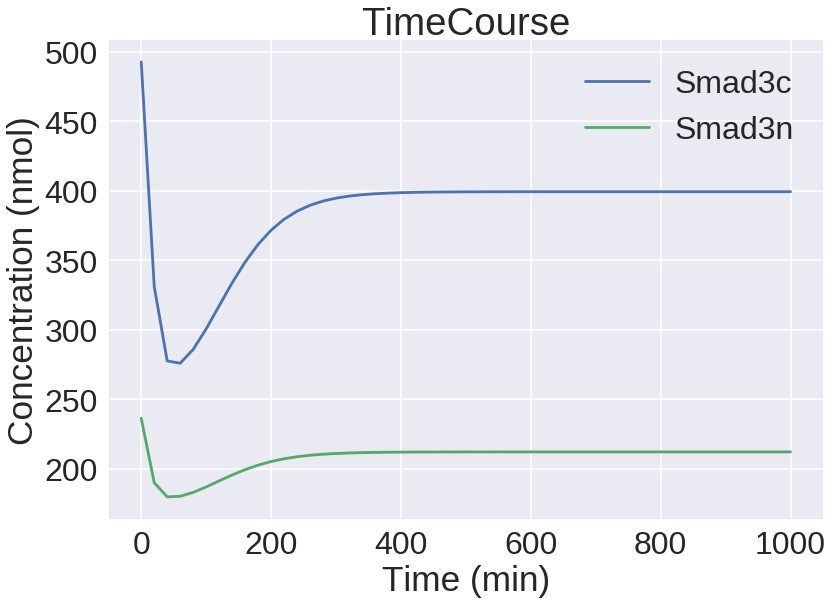

In [14]:
viz.PlotTimeCourse(TC, y=['Smad3c', 'Smad3n'], separate=False, savefig=True, filename='MyTimeCourse.eps')